<a href="https://colab.research.google.com/github/leo0622nycu/Essay/blob/main/XGboost_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
drive.mount('/content/drive')

ARIMA_OUTPUT = pd.read_csv('/content/drive/MyDrive/CSV/ARIMA_OUTPUT.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ARIMA_OUTPUT['time'] = pd.to_datetime(ARIMA_OUTPUT['time'], format='%Y-%m-%d')
ARIMA_OUTPUT.set_index('time', inplace=True)
print(ARIMA_OUTPUT)

             revenue  predicted_mean   diff_1     residuals
time                                                       
2014-01-01   51430.0    30185.751353   1749.0  21244.248647
2014-02-01   46829.0    37736.236749  -4601.0   9092.763251
2014-03-01   49956.0    64449.814235   3127.0 -14493.814235
2014-04-01   61887.0    48770.798303  11931.0  13116.201697
2014-05-01   60789.0    46333.241718  -1098.0  14455.758282
...              ...             ...      ...           ...
2024-07-01  256953.0   233264.872884  49084.0  -5053.962212
2024-08-01  250866.0   230188.241330  -6087.0  -8309.454405
2024-09-01  251873.0   238161.430872   1007.0     36.413980
2024-10-01  314240.0   271027.036806  62367.0    894.060159
2024-11-01  276058.0   285021.896380 -38182.0  13413.403211

[131 rows x 4 columns]


In [24]:
# Initialize features and targets
X_grouped = []
Y_grouped = []

# Construct features and targets
for i in range(3, len(ARIMA_OUTPUT)):
    # Lagged diff_1 and residuals (2 lags)
    x_diff_1 = ARIMA_OUTPUT['diff_1'].iloc[i-1:i].values.tolist()
    x_residuals = ARIMA_OUTPUT['residuals'].iloc[i-3:i].values.tolist()
    x_predicted_mean = ARIMA_OUTPUT['predicted_mean'].iloc[i-2:i].values.tolist()

    # Next predicted_mean value (from index i)
    #x_predicted_mean = [ARIMA_OUTPUT['predicted_mean'].iloc[i]]

    # Organize into grouped structure
    x_grouped = {
        #'diff_1': x_diff_1,
        'residuals': x_residuals,
        #'predicted_mean': x_predicted_mean,
    }
    X_grouped.append(x_grouped)

    # Next revenue value (from index i)
    y_value = ARIMA_OUTPUT['residuals'].iloc[i]
    Y_grouped.append(y_value)

# Confirm the result
print(X_grouped)
print(Y_grouped)

[{'residuals': [21244.248647315548, 9092.763250921307, -14493.814235076592]}, {'residuals': [9092.763250921307, -14493.814235076592, 13116.20169715795]}, {'residuals': [-14493.814235076592, 13116.20169715795, 14455.758282181168]}, {'residuals': [13116.20169715795, 14455.758282181168, -6540.562657700721]}, {'residuals': [14455.758282181168, -6540.562657700721, -2378.879003268288]}, {'residuals': [-6540.562657700721, -2378.879003268288, 13353.710193225916]}, {'residuals': [-2378.879003268288, 13353.710193225916, 8044.339912223266]}, {'residuals': [13353.710193225916, 8044.339912223266, 2044.542772457324]}, {'residuals': [8044.339912223266, 2044.542772457324, -4632.136394114612]}, {'residuals': [2044.542772457324, -4632.136394114612, -4359.763496147003]}, {'residuals': [-4632.136394114612, -4359.763496147003, 13188.92187674262]}, {'residuals': [-4359.763496147003, 13188.92187674262, -14938.799146477846]}, {'residuals': [13188.92187674262, -14938.799146477846, 1656.8823828433233]}, {'resid

In [25]:
X_flattened = []
for x_dict in X_grouped:
    # 依照順序將 diff_1, predicted_mean, residuals 三段串起來
    # 注意：x_dict['diff_1'] 是多個值 (ex: 3個 lag)，
    #       x_dict['predicted_mean'] 和 x_dict['residuals'] 各是一個或多個值
    #flattened = x_dict['diff_1'] + x_dict['predicted_mean'] + x_dict['residuals']
    flattened = x_dict['residuals']
    X_flattened.append(flattened)

In [26]:
X_array = np.array(X_flattened)
y_array = np.array(Y_grouped)
print(X_array)
print(y_array)

[[ 2.12442486e+04  9.09276325e+03 -1.44938142e+04]
 [ 9.09276325e+03 -1.44938142e+04  1.31162017e+04]
 [-1.44938142e+04  1.31162017e+04  1.44557583e+04]
 [ 1.31162017e+04  1.44557583e+04 -6.54056266e+03]
 [ 1.44557583e+04 -6.54056266e+03 -2.37887900e+03]
 [-6.54056266e+03 -2.37887900e+03  1.33537102e+04]
 [-2.37887900e+03  1.33537102e+04  8.04433991e+03]
 [ 1.33537102e+04  8.04433991e+03  2.04454277e+03]
 [ 8.04433991e+03  2.04454277e+03 -4.63213639e+03]
 [ 2.04454277e+03 -4.63213639e+03 -4.35976350e+03]
 [-4.63213639e+03 -4.35976350e+03  1.31889219e+04]
 [-4.35976350e+03  1.31889219e+04 -1.49387991e+04]
 [ 1.31889219e+04 -1.49387991e+04  1.65688238e+03]
 [-1.49387991e+04  1.65688238e+03 -1.84987611e+02]
 [ 1.65688238e+03 -1.84987611e+02  4.66796422e+03]
 [-1.84987611e+02  4.66796422e+03 -1.45179561e+04]
 [ 4.66796422e+03 -1.45179561e+04  1.19241658e+04]
 [-1.45179561e+04  1.19241658e+04 -4.84802265e+02]
 [ 1.19241658e+04 -4.84802265e+02 -4.71880744e+03]
 [-4.84802265e+02 -4.71880744e+

In [29]:
import pandas as pd



train_X = X_flattened[:101]
train_Y = Y_grouped[:101]

test_X =  X_flattened[101:]
test_Y = Y_grouped[101:]
train_X = pd.DataFrame(X_array)
train_Y = pd.Series(y_array)

train_size = int(len(train_X) * 0.8)

X_tr = train_X.iloc[:train_size]
y_tr = train_Y.iloc[:train_size]
X_val = train_X.iloc[train_size:]
y_val = train_Y.iloc[train_size:]

print(train_X)
print(train_Y)
print(test_X)
print(test_Y)
print(len(test_Y))

                0             1             2
0    21244.248647   9092.763251 -14493.814235
1     9092.763251 -14493.814235  13116.201697
2   -14493.814235  13116.201697  14455.758282
3    13116.201697  14455.758282  -6540.562658
4    14455.758282  -6540.562658  -2378.879003
..            ...           ...           ...
123   -484.802265  -4718.807439   6014.562249
124  -4718.807439   6014.562249  -5053.962212
125   6014.562249  -5053.962212  -8309.454405
126  -5053.962212  -8309.454405     36.413980
127  -8309.454405     36.413980    894.060159

[128 rows x 3 columns]
0      13116.201697
1      14455.758282
2      -6540.562658
3      -2378.879003
4      13353.710193
           ...     
123    -5053.962212
124    -8309.454405
125       36.413980
126      894.060159
127    13413.403211
Length: 128, dtype: float64
[[-16573.766642009665, 6193.616109529918, 40262.91883991519], [6193.616109529918, 40262.91883991519, 21244.248647315548], [40262.91883991519, 21244.248647315548, 9092.763250921

In [7]:
!pip install scikit-learn==1.3.2

In [11]:
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)


In [30]:

#from sklearn.metrics import mean_squared_error, r2_score
#import xgboost as xgb
#from re import X
#from xgboost import XGBRegressor

#model = xgb.XGBRegressor(
   #n_estimators=1000,
    #learning_rate=0.1,
    #max_depth=10,
    #random_state=100,
#)
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_dist = {
    'max_depth':           np.arange(3, 11),
    'min_child_weight':    np.arange(1, 11),
    'gamma':               np.linspace(0, 5, 10),
    'subsample':           np.linspace(0.6, 1.0, 5),
    'colsample_bytree':    np.linspace(0.6, 1.0, 5),
    'reg_alpha':           np.linspace(0, 1, 5),
    'reg_lambda':          np.linspace(0, 10, 5),
}

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    learning_rate=0.05,
    n_estimators=10000,
    random_state=100
)

# 將 early stopping 設定進參數內（新版本要求這樣做）
model.set_params(early_stopping_rounds=100, eval_metric='rmse')

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=100,
    n_jobs=-1
)

search.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

print("Best params:", search.best_params_)
print("Best RMSE:", -search.best_score_)





Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best params: {'subsample': 1.0, 'reg_lambda': 5.0, 'reg_alpha': 0.25, 'min_child_weight': 7, 'max_depth': 6, 'gamma': 3.3333333333333335, 'colsample_bytree': 1.0}
Best RMSE: 12651.658367168164


In [31]:
import xgboost as xgb

best_model = xgb.XGBRegressor(
    **search.best_params_,
    objective='reg:squarederror',
    learning_rate=0.05,
    n_estimators=10000,
    tree_method='hist',
    random_state=100
)
best_model.set_params(
    early_stopping_rounds=100,
    eval_metric='rmse'
)

# 合併訓練資料
X_full = pd.concat([X_tr, X_val])
y_full = pd.concat([y_tr, y_val])

best_model.fit(
    X_full, y_full,
    eval_set=[(X_val, y_val)],
    verbose=True
)

from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = best_model.predict(test_X)

rmse_test = mean_squared_error(test_Y, y_test_pred, squared=False)
r2_test = r2_score(test_Y, y_test_pred)

print(f"✅ Test RMSE: {rmse_test:.2f}")
print(f"✅ Test R²: {r2_test:.4f}")

[0]	validation_0-rmse:8846.41128
[1]	validation_0-rmse:8713.06912
[2]	validation_0-rmse:8589.11337
[3]	validation_0-rmse:8486.92275
[4]	validation_0-rmse:8366.30483
[5]	validation_0-rmse:8276.67793
[6]	validation_0-rmse:8170.91999
[7]	validation_0-rmse:8068.67636
[8]	validation_0-rmse:7988.48788
[9]	validation_0-rmse:7894.45103
[10]	validation_0-rmse:7802.03866
[11]	validation_0-rmse:7725.07214
[12]	validation_0-rmse:7586.03496
[13]	validation_0-rmse:7507.47932
[14]	validation_0-rmse:7380.36087
[15]	validation_0-rmse:7321.72009
[16]	validation_0-rmse:7190.77105
[17]	validation_0-rmse:7114.55770
[18]	validation_0-rmse:7075.41051
[19]	validation_0-rmse:6973.66878
[20]	validation_0-rmse:6919.23969
[21]	validation_0-rmse:6880.89957
[22]	validation_0-rmse:6818.48956
[23]	validation_0-rmse:6746.65789
[24]	validation_0-rmse:6716.25753
[25]	validation_0-rmse:6615.67048
[26]	validation_0-rmse:6605.06136
[27]	validation_0-rmse:6583.14927
[28]	validation_0-rmse:6493.41239
[29]	validation_0-rmse:6

In [32]:
print(y_test_pred)

[ 21229.236      9089.814    -14494.227     13116.195     14456.283
  -6541.712     -2378.4712    13354.212      8044.517      2044.2672
  -4632.372     -4360.041     13187.704    -14938.71       1656.7347
   -184.31479    4667.977    -14518.38      11924.179      -485.16638
  -4721.1987     6014.0493    -5050.8716    -8307.752        35.253048
    894.43225   13413.024   ]


In [38]:
y_pred_test_1 = y_test_pred + ARIMA_OUTPUT['predicted_mean'][104:]
print(ARIMA_OUTPUT['predicted_mean'][104:])
print(y_pred_test_1)

time
2022-09-01    197532.898379
2022-10-01    210548.390823
2022-11-01    218088.081253
2022-12-01    217654.802244
2023-01-01    204526.895095
2023-02-01    202041.856205
2023-03-01    176477.893855
2023-04-01    151990.928373
2023-05-01    138691.142534
2023-06-01    160855.838020
2023-07-01    166071.386746
2023-08-01    174833.835058
2023-09-01    183086.490194
2023-10-01    181448.784492
2023-11-01    220858.913318
2023-12-01    218630.816160
2024-01-01    204006.626455
2024-02-01    191263.773223
2024-03-01    186131.114625
2024-04-01    205507.675811
2024-05-01    205787.889424
2024-06-01    228840.082119
2024-07-01    233264.872884
2024-08-01    230188.241330
2024-09-01    238161.430872
2024-10-01    271027.036806
2024-11-01    285021.896380
Name: predicted_mean, dtype: float64
time
2022-09-01    218762.134707
2022-10-01    219638.205276
2022-11-01    203593.854691
2022-12-01    230770.997556
2023-01-01    218983.178298
2023-02-01    195500.144291
2023-03-01    174099.422664
2

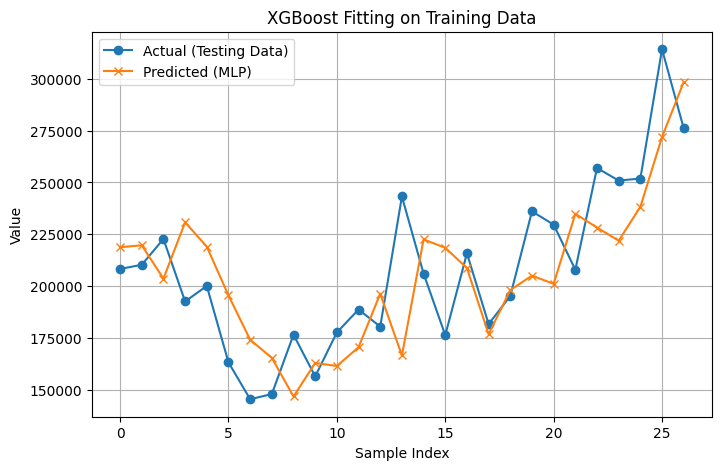

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(len(ARIMA_OUTPUT['revenue'][104:])), ARIMA_OUTPUT['revenue'][104:], marker='o', label='Actual (Testing Data)')


#y_pred_test_1d = y_pred_test_1.flatten()
plt.plot(range(len(y_pred_test_1)), y_pred_test_1, marker='x', label='Predicted (MLP)')
plt.title('XGBoost Fitting on Training Data')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



# 1. 計算 RMSE
rmse = np.sqrt(mean_squared_error(ARIMA_OUTPUT['revenue'][104:], y_pred_test_1))

# 2. 計算 MAE
mae = mean_absolute_error(ARIMA_OUTPUT['revenue'][104:], y_pred_test_1)

# 3. 計算 MAPE
mape = np.mean(np.abs((ARIMA_OUTPUT['revenue'][104:] - y_pred_test_1) / ARIMA_OUTPUT['revenue'][104:])) * 100

# 4. 輸出結果
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")

RMSE : 27882.86
MAE : 23479.81
MAPE : 11.35%
